<a href="https://colab.research.google.com/github/steve122192/philly_crime_analysis/blob/master/philly_crime_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import datetime
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv('incidents_part1_part2.csv')
df['dispatch_date'] = pd.to_datetime(df['dispatch_date'])

In [19]:
df

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,129,9,2,2020-03-25 18:32:00,2020-03-25,18:32:00,18,202009012094,1400 BLOCK SPRING GARDEN ST,600,Theft from Vehicle,-75.161446,39.962334,39.962334,-75.161446
1,41,77,A,2020-03-08 19:08:00,2020-03-08,19:08:00,19,202077001196,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
2,42,77,A,2020-03-15 18:41:00,2020-03-15,18:41:00,18,202077001312,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
3,43,77,A,2020-03-18 08:17:00,2020-03-18,08:17:00,8,202077001343,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
4,44,77,A,2020-04-03 15:32:33,2020-04-03,15:32:33,15,202077001460,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103705,5253186,16,2,2020-09-23 11:13:39,2020-09-23,11:13:39,11,202016036076,800 BLOCK N 46TH ST,800,Other Assaults,-75.213683,39.968523,39.968523,-75.213683
103706,3821930,19,1,2020-07-11 00:33:16,2020-07-11,00:33:16,0,202019044845,7200 BLOCK HAVERFORD AV,600,Theft from Vehicle,-75.261351,39.974957,39.974957,-75.261351
103707,4372141,17,3,2020-08-06 13:08:00,2020-08-06,13:08:00,13,202017022625,1900 BLOCK WATKINS ST,1400,Vandalism/Criminal Mischief,-75.177072,39.929892,39.929892,-75.177072
103708,4092171,18,1,2020-07-22 14:47:06,2020-07-22,14:47:06,14,202018052559,5800 BLOCK NORFOLK ST,800,Other Assaults,-75.240107,39.949705,39.949705,-75.240107


In [20]:
df['text_general_code'].value_counts()

Other Assaults                             16710
Thefts                                     15545
All Other Offenses                         13089
Vandalism/Criminal Mischief                10883
Theft from Vehicle                          9420
Fraud                                       6472
Narcotic / Drug Law Violations              5153
Aggravated Assault No Firearm               3987
Motor Vehicle Theft                         3400
Aggravated Assault Firearm                  2723
Burglary Residential                        2636
Weapon Violations                           2364
Burglary Non-Residential                    2267
Robbery No Firearm                          2061
DRIVING UNDER THE INFLUENCE                 1291
Robbery Firearm                             1193
Recovered Stolen Motor Vehicle              1150
Disorderly Conduct                           666
Rape                                         583
Other Sex Offenses (Not Commercialized)      525
Arson               

In [29]:
violent_crimes = ['Aggravated Assault Firearm','Aggravated Assault No Firearm',
                  'Robbery No Firearm','Robbery Firearm','Rape','Arson','Homicide - Criminal']
vehicle_theft =  df[df['text_general_code'] == 'Theft from Vehicle']
vehicle = df[(df['text_general_code'] == 'Theft from Vehicle') | (df['text_general_code'] == 'Motor Vehicle Theft')]
gta =  df[df['text_general_code'] == 'Motor Vehicle Theft']
murder =  df[df['text_general_code'] == 'Homicide - Criminal']
rape =  df[df['text_general_code'] == 'Rape']
violent = df[df['text_general_code'].isin(violent_crimes)]

In [30]:
fig = px.histogram(violent, x="text_general_code", title='2020 Violent Crimes By Category - Philly',
                   labels = {'text_general_code': 'Crime Category'})
fig.show()

Text(0.5, 1.0, 'Violent Crime in Philly by Date - 2020')

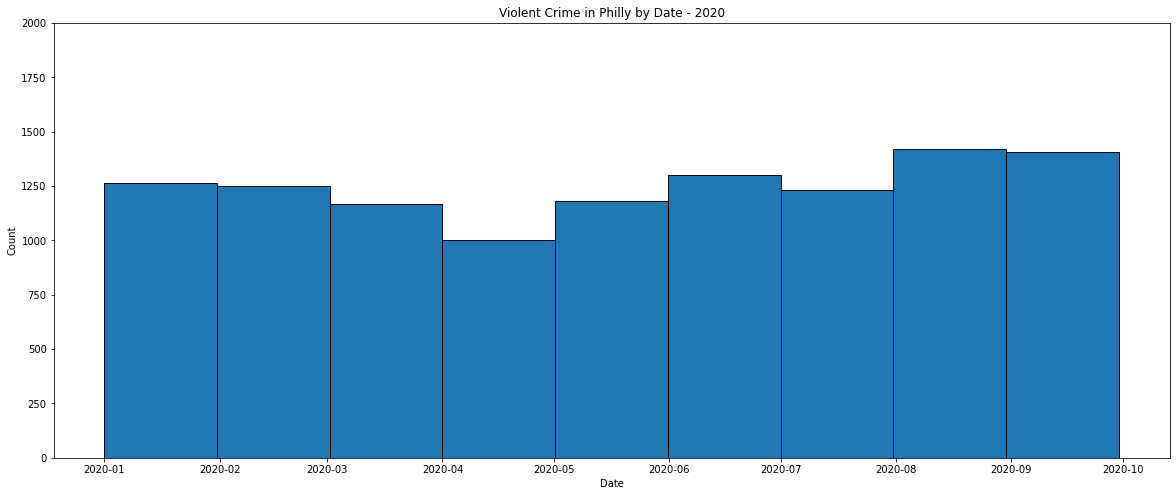

In [32]:
fig, ax = plt.subplots(figsize=(20,8))
ax.hist(violent['dispatch_date'], density=False, bins=9, ec='black')  # `density=False` would make counts
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_ylim(0,2000)
plt.title('Violent Crime in Philly by Date - 2020')

In [33]:
px.set_mapbox_access_token('pk.eyJ1Ijoic3RldmUxMjIxOTIiLCJhIjoiY2tmcGVsYnJvMDk3MDJ5cHNyOTQzczFhdCJ9.aL5MhnYqYoccWHcTgwRDVg')
fig = px.scatter_mapbox(violent, lat="lat", lon="lng",     color="hour_",
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  labels = {'text_general_code': 'Crime'}, hover_data = ['text_general_code'],
                  center = {'lat': 39.9528, 'lon': -75.1635}, height=700, title='Violent Crime In Philly - 2020')
fig.show()

In [34]:
px.set_mapbox_access_token('pk.eyJ1Ijoic3RldmUxMjIxOTIiLCJhIjoiY2tmcGVsYnJvMDk3MDJ5cHNyOTQzczFhdCJ9.aL5MhnYqYoccWHcTgwRDVg')
fig = px.scatter_mapbox(vehicle_theft, lat="lat", lon="lng",     color="hour_",
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  labels = {'text_general_code': 'Crime'}, hover_data = ['text_general_code'],
                  center = {'lat': 39.9528, 'lon': -75.1635}, height=700, title='Places to Avoid Parking In Philly - 2020')
fig.show()

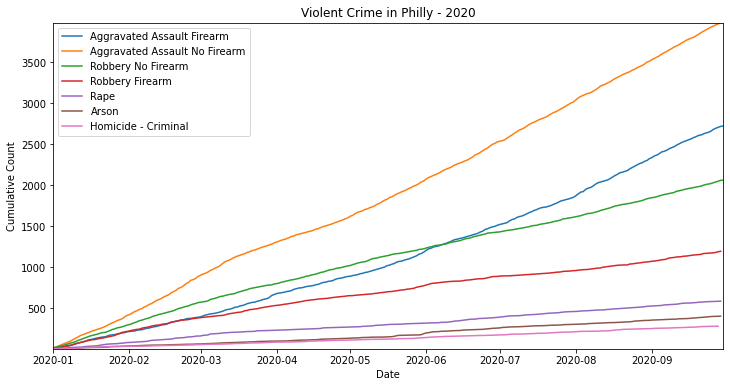

In [35]:
fig, ax = plt.subplots(figsize=(12,6))
for crime in violent_crimes:
  table = df[df['text_general_code'] == crime]
  table = table.sort_values('dispatch_date', axis=0)
  table = table.groupby('dispatch_date').size().reset_index(name='counts')
  table['total'] = table['counts'].cumsum()
  ax.plot(table['dispatch_date'],table['total'], linewidth=1.5, label=crime)
ax.margins(0.0)
ax.legend()
plt.title('Violent Crime in Philly - 2020')
plt.ylabel('Cumulative Count')
plt.xlabel('Date')
plt.show()
plt.close()


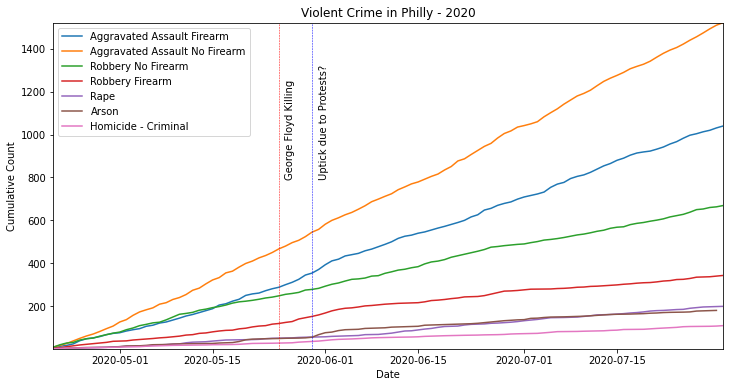

In [36]:
fig, ax = plt.subplots(figsize=(12,6))
for crime in violent_crimes:
  table = df[df['text_general_code'] == crime]
  table = table[(table['dispatch_date'] > '2020-04-20') & (table['dispatch_date'] < '2020-08-01')]
  table = table.sort_values('dispatch_date', axis=0)
  table = table.groupby('dispatch_date').size().reset_index(name='counts')
  table['total'] = table['counts'].cumsum()
  ax.plot(table['dispatch_date'],table['total'], linewidth=1.5, label=crime)
ax.margins(0,0)
ax.legend()  
ax.axvline(x=datetime.date(2020, 5, 25), linestyle='--', color = 'red', linewidth=.5)
ax.axvline(x=datetime.date(2020, 5, 30), linestyle='--', color = 'blue', linewidth=.5)
ax.text(datetime.date(2020, 5, 26),800,'George Floyd Killing',rotation=90)
ax.text(datetime.date(2020, 5, 31),800,'Uptick due to Protests?',rotation=90)
plt.title('Violent Crime in Philly - 2020')
plt.ylabel('Cumulative Count')
plt.xlabel('Date')
plt.show()
plt.close()

In [92]:
columns = ['dispatch_date', 'text_general_code']
df = pd.read_csv('incidents_part1_part2.csv', usecols=columns)
df1 = pd.read_csv('incidents_part1_part2 (1).csv', usecols=columns)
df2 = pd.read_csv('incidents_part1_part2 (2).csv', usecols=columns)
df3 = pd.read_csv('incidents_part1_part2 (3).csv', usecols=columns)
df4 = pd.read_csv('incidents_part1_part2 (4).csv', usecols=columns)
df5 = pd.read_csv('incidents_part1_part2 (5).csv', usecols=columns)
frames = [df,df1,df2,df3,df4,df5]
df = pd.concat(frames)
df['dispatch_date'] = pd.to_datetime(df['dispatch_date'])

In [93]:
murder = df[df['text_general_code'] == 'Homicide - Criminal']
murder = murder.sort_values('dispatch_date', axis=0)
murder = murder.groupby('dispatch_date').size().reset_index(name='counts')
murder['total'] = murder['counts'].cumsum()

In [94]:
fb =  murder[['dispatch_date','total']]
fb.rename(columns={'dispatch_date': 'ds', 'total': 'y'}, inplace=True)
fb

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2015-01-01,1
1,2015-01-02,2
2,2015-01-03,3
3,2015-01-04,4
4,2015-01-06,5
...,...,...
1045,2020-09-20,1567
1046,2020-09-21,1570
1047,2020-09-24,1573
1048,2020-09-27,1574


In [95]:
!pip install fbprophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


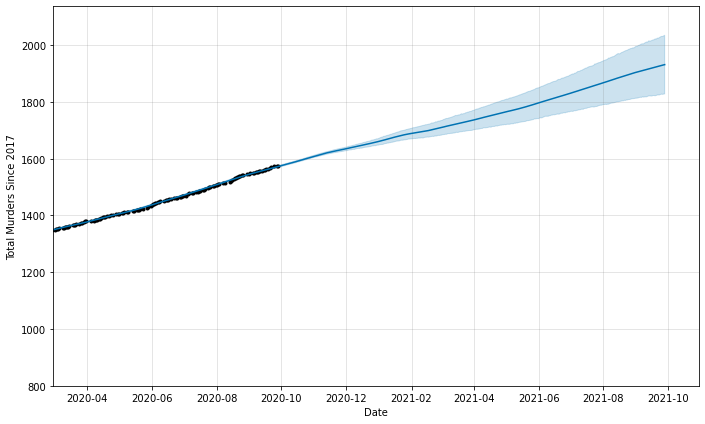

In [96]:
from fbprophet import Prophet
prf=Prophet()
prf.fit(fb)
df_future=prf.make_future_dataframe(periods=365,freq='D')
df_future=prf.predict(df_future)
fig = prf.plot(df_future,xlabel='Date',ylabel='Total Murders Since 2017')
ax = fig.gca()
ax.set_xlim(datetime.date(2020, 2, 29),datetime.date(2021, 10, 30))
ax.set_ylim(800)
ax.margins(-.3,-.3)

plt.show()

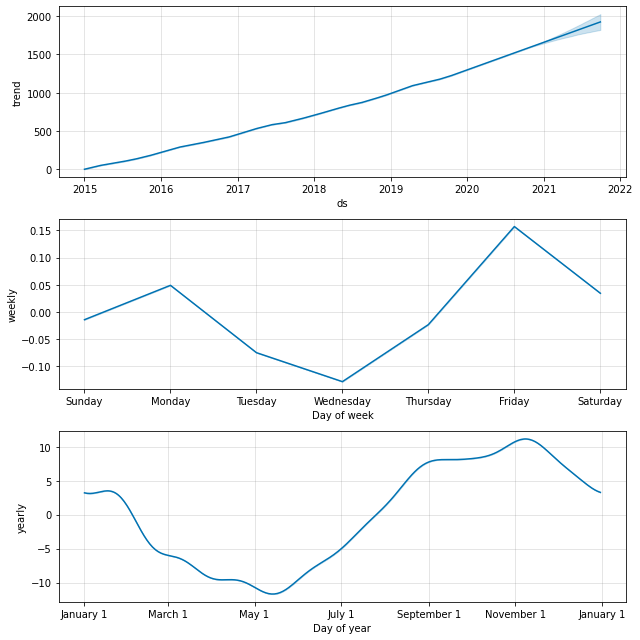

In [97]:
fig = prf.plot_components(df_future)
fig.show()



In [98]:
df

,dispatch_date,text_general_code
0,2020-03-25,Theft from Vehicle
1,2020-03-08,Thefts
2,2020-03-15,Thefts
3,2020-03-18,Thefts
4,2020-04-03,Thefts
...,...,...
174718,2015-01-21,Motor Vehicle Theft
174719,2015-05-01,Motor Vehicle Theft
174720,2015-02-24,Motor Vehicle Theft
174721,2015-12-29,Motor Vehicle Theft


In [99]:
df = df.sort_values('dispatch_date')
df

,dispatch_date,text_general_code
123176,2015-01-01,Other Assaults
119123,2015-01-01,Vandalism/Criminal Mischief
4059,2015-01-01,Thefts
131804,2015-01-01,All Other Offenses
131805,2015-01-01,All Other Offenses
...,...,...
91141,2020-09-30,Aggravated Assault Firearm
91026,2020-09-30,Aggravated Assault Firearm
91027,2020-09-30,Aggravated Assault Firearm
81118,2020-09-30,Robbery No Firearm


In [100]:
df = df[df['text_general_code'] == 'Homicide - Criminal']
df

,dispatch_date,text_general_code
172941,2015-01-01,Homicide - Criminal
173006,2015-01-02,Homicide - Criminal
172962,2015-01-03,Homicide - Criminal
172991,2015-01-04,Homicide - Criminal
173017,2015-01-06,Homicide - Criminal
...,...,...
76350,2020-09-24,Homicide - Criminal
76620,2020-09-24,Homicide - Criminal
76621,2020-09-24,Homicide - Criminal
81910,2020-09-27,Homicide - Criminal


In [101]:
df.set_index('dispatch_date', inplace=True)
df

,text_general_code
dispatch_date,
2015-01-01,Homicide - Criminal
2015-01-02,Homicide - Criminal
2015-01-03,Homicide - Criminal
2015-01-04,Homicide - Criminal
2015-01-06,Homicide - Criminal
...,...
2020-09-24,Homicide - Criminal
2020-09-24,Homicide - Criminal
2020-09-24,Homicide - Criminal


In [102]:
monthly = df.groupby(df.index).size().reset_index(name='counts')

In [103]:
monthly

,dispatch_date,counts
0,2015-01-01,1
1,2015-01-02,1
2,2015-01-03,1
3,2015-01-04,1
4,2015-01-06,1
...,...,...
1045,2020-09-20,2
1046,2020-09-21,3
1047,2020-09-24,3
1048,2020-09-27,1


In [104]:
monthly.set_index('dispatch_date', inplace=True)

In [105]:
monthly = monthly.groupby(pd.Grouper(freq='M')).sum()
monthly

,counts
dispatch_date,
2015-01-31,26
2015-02-28,10
2015-03-31,14
2015-04-30,4
2015-05-31,25
...,...
2020-05-31,29
2020-06-30,34
2020-07-31,38


In [106]:
fb = monthly.reset_index()
fb.rename(columns={'dispatch_date': 'ds', 'counts': 'y'}, inplace=True)
fb

,ds,y
0,2015-01-31,26
1,2015-02-28,10
2,2015-03-31,14
3,2015-04-30,4
4,2015-05-31,25
...,...,...
64,2020-05-31,29
65,2020-06-30,34
66,2020-07-31,38
67,2020-08-31,39


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


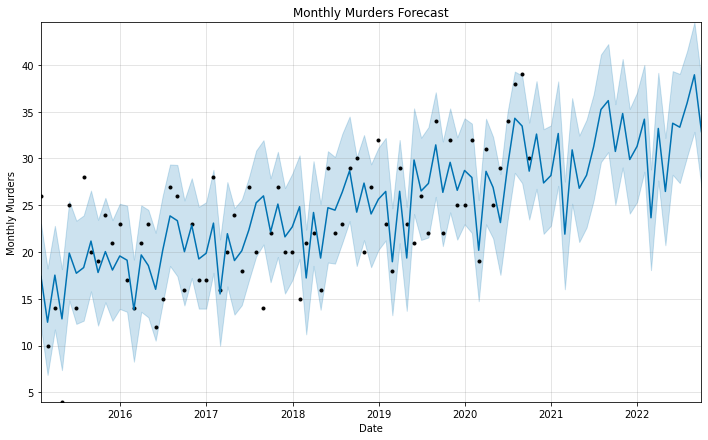

In [115]:
prf=Prophet(seasonality_mode='multiplicative')
prf.fit(fb)
df_future=prf.make_future_dataframe(periods=24,freq='M')
df_future=prf.predict(df_future)
fig = prf.plot(df_future,xlabel='Date',ylabel='Monthly Murders')
ax = fig.gca()
plt.title('Monthly Murders Forecast')
# ax.set_xlim(datetime.date(2020, 2, 29),datetime.date(2021, 10, 30))
# ax.set_ylim(800)
ax.margins(0,0)

plt.show()